In [92]:
# Install and ensure we have the libraries needed.
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install statsmodels

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2971 sha256=41c65dd2a1d0bdc54af662413db02837bf6c750b4dcf6c36675afd9d20caba6f
  Stored in directory: c:\users\god\appdata\local\pip\cache\wheels\08\17\db\46486df299847133f69165c029fe388fac45781eb5d436c569
Successfully built sklearn


In [1]:
# Import libraries needed.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
import math
from statsmodels.stats import diagnostic as diag
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [2]:
#Import the raw dataset into Pandas and display.
df=pd.read_csv('churn_raw_data.csv')
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [3]:
#List total number of entries in dataset (RowsxColumn).
print(df.shape)

(10000, 52)


In [4]:
#Display the datatype for each column.
print(df.dtypes)

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [5]:
#Perform checks to see if null values exists.
print(df.isna().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [6]:
#Rename the columns named item1 item2, etc.
df=df.rename({'item1' : 'Timely_Response',
                    'item2' : 'Timely_Fixes',
                    'item3' : 'Timely_Replacement',
                    'item4' : 'Reliability',
                    'item5' : 'Options',
                    'item6' : 'Respectable_Response',
                    'item7' : 'Courteous_Exchange',
                    'item8' : 'Evidence_of_active_listening'}, axis='columns')

In [7]:
#Look at the basic statistics of the dataset.
df[['Bandwidth_GB_Year', 'Area','Employment','Income','Contract',
        'Timely_Fixes','Timely_Replacement','Reliability','Options',
        'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening']].describe()

,Bandwidth_GB_Year,Income,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
count,8979.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3398.842752,39936.762226,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2187.396807,28358.469482,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,155.506715,740.660000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1234.110529,19285.522500,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3382.424000,33186.785000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,5587.096500,53472.395000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,7158.982000,258900.700000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
#Create new dataframe and drop all unused columns for our Multiple regression
dflog=df.drop(['Unnamed: 0','Age','CaseOrder','Customer_id','Interaction','City','State',
               'County','Zip','Lat','Lng','Population','Timezone','Job',
               'Children','Education','Marital', 'Outage_sec_perweek',
               'Email','Contacts','Yearly_equip_failure', 'Gender','PaperlessBilling',
               'MonthlyCharge','PaymentMethod', 'Techie','Port_modem','Tablet', 'Tenure','Churn'], axis = 1)

dflog

,Area,Employment,Income,Contract,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
0,Urban,Part Time,28561.99,One year,Fiber Optic,Yes,No,Yes,Yes,No,...,Yes,904.536110,5,5,5,3,4,4,3,4
1,Urban,Retired,21704.77,Month-to-month,Fiber Optic,Yes,Yes,Yes,No,No,...,Yes,800.982766,3,4,3,3,4,3,4,4
2,Urban,Student,NaN,Two Year,DSL,Yes,Yes,No,No,No,...,Yes,2054.706961,4,4,2,4,4,3,3,3
3,Suburban,Retired,18925.23,Two Year,DSL,Yes,No,Yes,No,No,...,No,2164.579412,4,4,4,2,5,4,3,3
4,Suburban,Student,40074.19,Month-to-month,Fiber Optic,No,No,No,No,No,...,No,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Retired,55723.74,Month-to-month,DSL,NaN,Yes,No,Yes,Yes,...,No,6511.253000,3,2,3,3,4,3,2,3
9996,Rural,Part Time,NaN,Two Year,Fiber Optic,NaN,Yes,Yes,Yes,Yes,...,No,5695.952000,4,5,5,4,4,5,2,5
9997,Rural,Full Time,NaN,Month-to-month,Fiber Optic,Yes,Yes,Yes,Yes,No,...,No,4159.306000,4,4,4,4,4,4,4,5
9998,Urban,Full Time,16667.58,Two Year,Fiber Optic,No,Yes,No,No,No,...,Yes,6468.457000,4,4,6,4,3,3,5,4


In [9]:
#Check for duplicate rows
dflog.duplicated().sum()

0

In [10]:
#Drop duplicate rows
dflog=dflog.drop_duplicates(keep='first')

In [11]:
#Check for duplicate rows
dflog.duplicated().unique()

array([False])

In [12]:
#Next we look at the unique string value from categorical columns that can be potentially recoded.
#A potential variable is any variable that is: easily understood, easily describable and can be methodologically recoded.
dflog['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
dflog['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [14]:
dflog['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [15]:
dflog['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [16]:
dflog['Phone'].unique()

array(['Yes', 'No', nan], dtype=object)

In [17]:
dflog['Multiple'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
dflog['OnlineSecurity'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
dflog['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
dflog['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
dflog['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
dflog['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
dflog['StreamingMovies'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
#Once we know the unique values for the categorical columns we want to change,
#we'll perform the necessary codes on them. First we'll change all binary values and the 'InternetService'
#column to 1 or 0. 
#We'll also fill NaN value for column 'TechSupport', 'Phone' with 0 as we will assume that these
#value were left empty as they did not apply to the customer.

dflog=dflog.replace(['Yes','Fiber Optic', 'DSL','Male'],'1')
dflog=dflog.replace(['No', 'None'],'0')
dflog[['TechSupport', 'Phone']] = dflog[['TechSupport', 'Phone']].fillna(value=0)
dflog=dflog.astype({'Bandwidth_GB_Year': 'float64',
                    'InternetService': 'float64', 
                    'Phone': 'float64',
                    'Multiple': 'float64',         
                    'OnlineSecurity': 'float64',
                    'OnlineBackup': 'float64',
                    'DeviceProtection': 'float64',
                    'TechSupport': 'float64',
                    'StreamingTV': 'float64',
                    'StreamingMovies': 'float64',})


In [25]:
#Recode Area with 'Urban'=2, 'Suburban'=1, 'Rural'=0. Also convert datatype to float.
dflog=dflog.replace(['Urban'] ,'2');
dflog=dflog.replace(['Suburban'],'1');
dflog=dflog.replace(['Rural'],'0');
dflog=dflog.astype({'Area': 'float64'})
print(dflog['Area'])

0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    2.0
9999    2.0
Name: Area, Length: 10000, dtype: float64


In [26]:
#Recode Employment 'Retired' from 4 to 'Unemployed' at 0. Also convert datatype to float.

dflog=dflog.replace(['Retired'] ,'4');
dflog=dflog.replace(['Full Time'] ,'3');
dflog=dflog.replace(['Part Time'] ,'2');
dflog=dflog.replace(['Student'],'1');
dflog=dflog.replace(['Unemployed'],'0');
dflog=dflog.astype({'Employment': 'float64'})
print(dflog['Employment'])

0       2.0
1       4.0
2       1.0
3       4.0
4       1.0
       ... 
9995    4.0
9996    2.0
9997    3.0
9998    3.0
9999    3.0
Name: Employment, Length: 10000, dtype: float64


In [27]:
#Recode Contract with 'Two Year'=2, 'One year'=1, 'Month-to-month'=0. Also convert datatype to float.

dflog=dflog.replace(['Two Year'],'2');
dflog=dflog.replace(['One year'],'1');
dflog=dflog.replace(['Month-to-month'],'0');
dflog=dflog.astype({'Contract': 'float64'})
print(dflog['Contract'])

0       1.0
1       0.0
2       2.0
3       2.0
4       0.0
       ... 
9995    0.0
9996    2.0
9997    0.0
9998    2.0
9999    0.0
Name: Contract, Length: 10000, dtype: float64


In [28]:
#Impute missing values with mean values.
#Print to see if there are still any null values.
dflog['Income'] = dflog['Income'].fillna(dflog['Income'].mean())
dflog['Bandwidth_GB_Year'] = dflog['Bandwidth_GB_Year'].fillna(dflog['Bandwidth_GB_Year'].mean())
print(dflog.isna().sum())

Area                            0
Employment                      0
Income                          0
Contract                        0
InternetService                 0
Phone                           0
Multiple                        0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Bandwidth_GB_Year               0
Timely_Response                 0
Timely_Fixes                    0
Timely_Replacement              0
Reliability                     0
Options                         0
Respectable_Response            0
Courteous_Exchange              0
Evidence_of_active_listening    0
dtype: int64


In [29]:
#Get summary statistics on final cleaned dataset
dflog.describe()

,Area,Employment,Income,Contract,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000000,2.506800,39936.762226,0.698600,0.787100,0.812800,0.460800,0.357600,0.450600,0.438600,...,0.489000,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,0.815761,1.113408,24575.114845,0.836079,0.409378,0.390091,0.498486,0.479317,0.497579,0.496241,...,0.499904,2072.712613,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,740.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,23660.790000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,39936.762226,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3398.842752,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,2.000000,3.000000,45504.192500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,4.000000,258900.700000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [30]:
#Set new variable for clean data
df_cln=dflog

In [31]:
#Review the new variable
df_cln.shape

(10000, 22)

array([[<Axes: title={'center': 'InternetService'}>,
        <Axes: title={'center': 'Phone'}>,
        <Axes: title={'center': 'Multiple'}>,
        <Axes: title={'center': 'OnlineSecurity'}>],
       [<Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'StreamingTV'}>],
       [<Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Employment'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'Timely_Fixes'}>,
        <Axes: title={'center': 'Timely_Replacement'}>,
        <Axes: title={'center': 'Reliability'}>],
       [<Axes: title={'center': 'Options'}>,
        <Axes: title={'center': 'Respectable_Response'}>,
        <Axes: title={'center': 'Courteous_Exchange'}>,
        <Axes: title={'center': 'Evidence_of_active_l

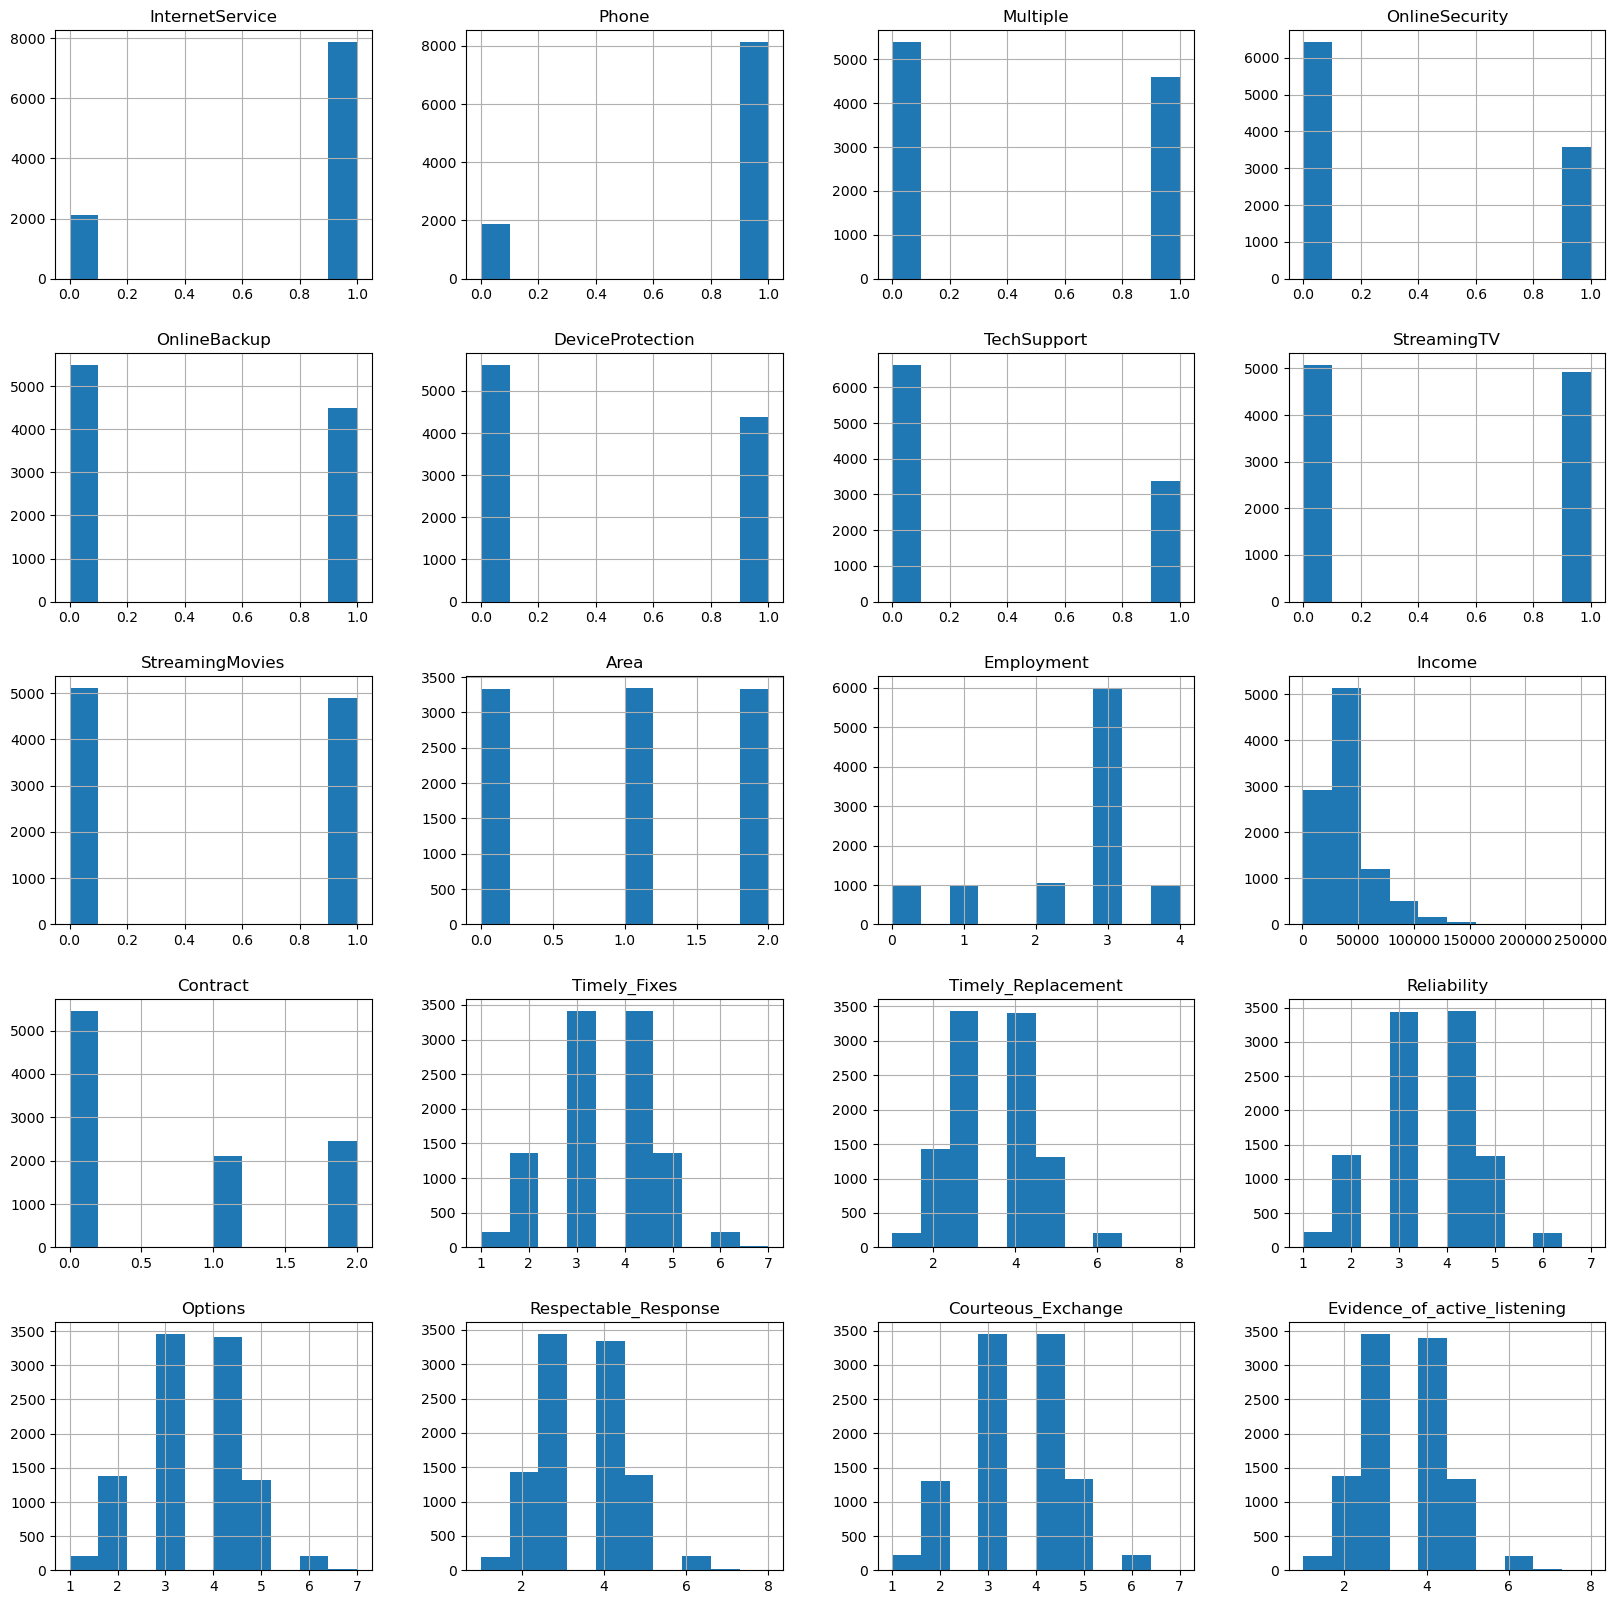

In [32]:
#Perform Univariate Analysis histogram on all predictor variables.
df_cln[['InternetService','Phone','Multiple','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
        'StreamingMovies','Area','Employment','Income',
        'Contract','Timely_Fixes','Timely_Replacement','Reliability',
        'Options','Respectable_Response','Courteous_Exchange',
        'Evidence_of_active_listening']].hist(figsize=(20,20),bins=10)


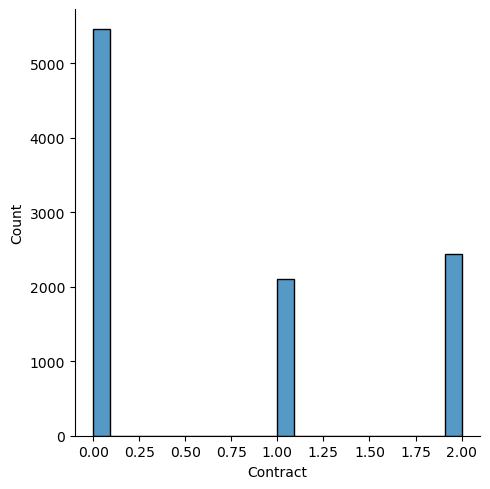

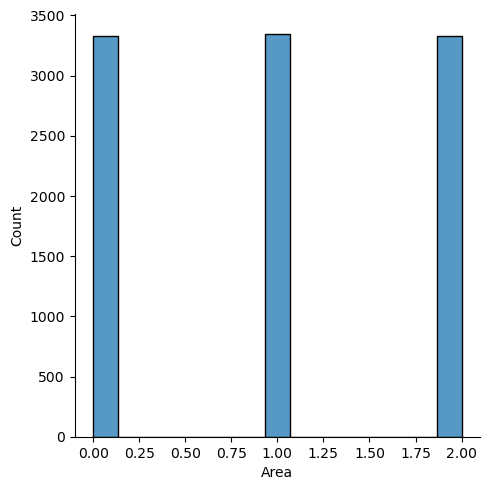

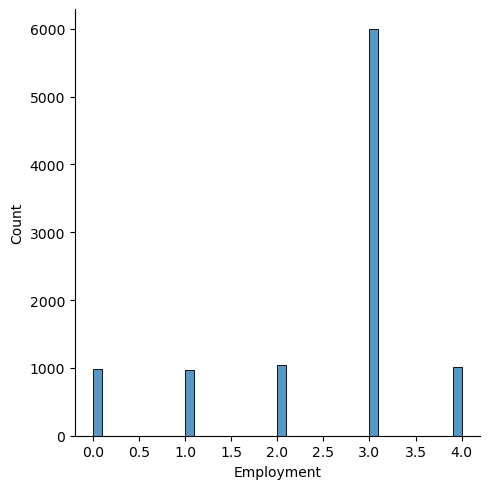

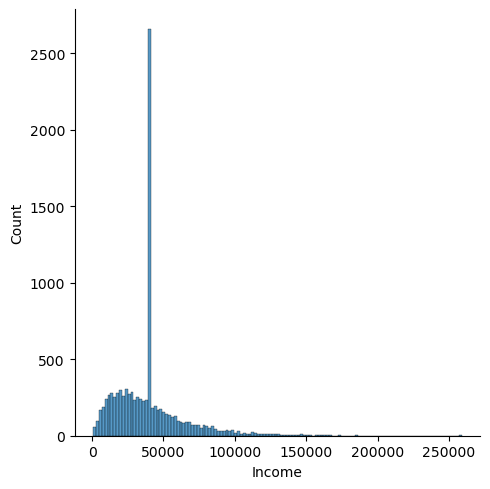

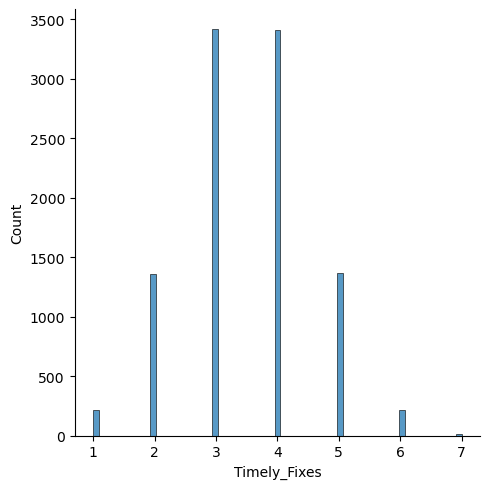

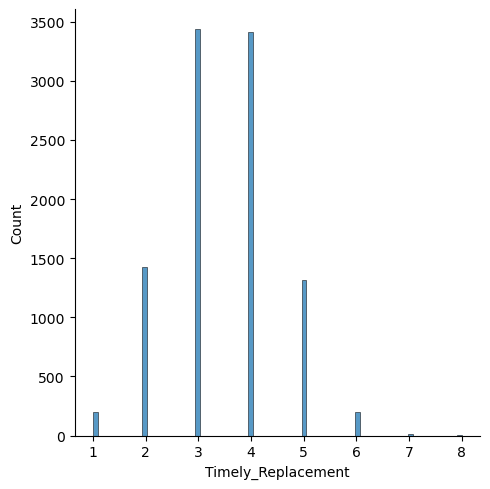

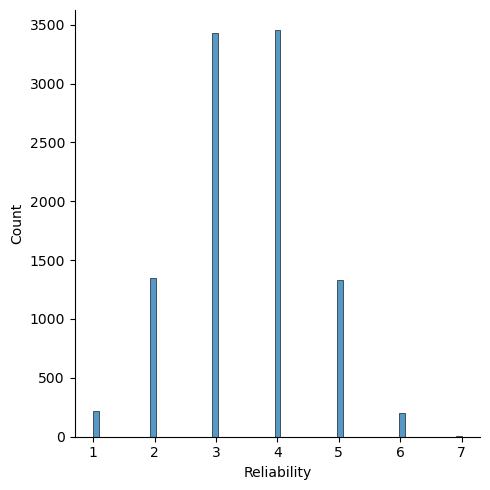

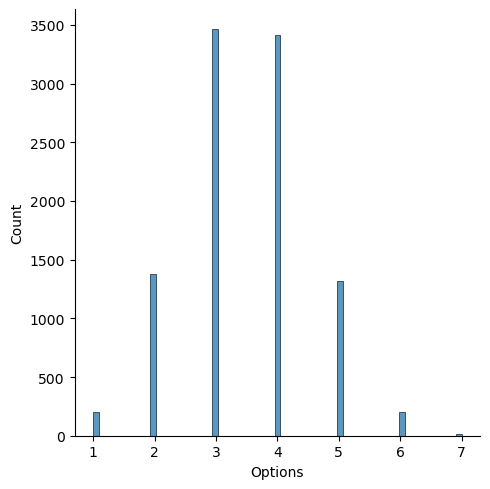

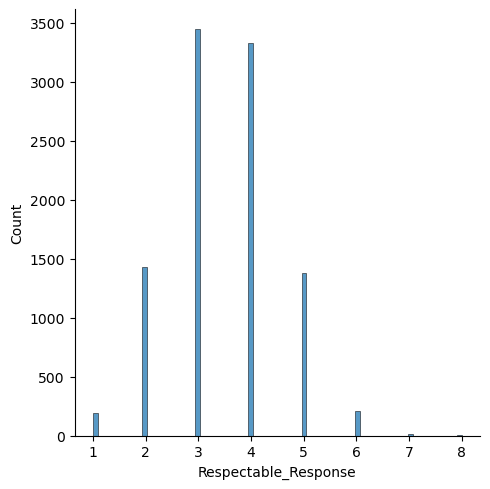

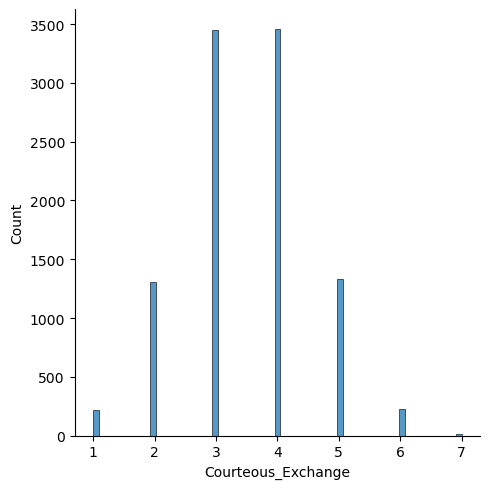

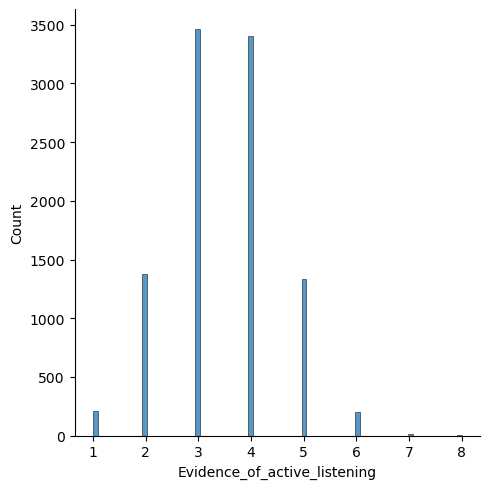

In [33]:
#Create a displot for all predictor variable.
sns.displot(df_cln['Contract'])
sns.displot(df_cln['Area'])
sns.displot(df_cln['Employment'])
sns.displot(df_cln['Income'])
sns.displot(df_cln['Timely_Fixes'])
sns.displot(df_cln['Timely_Replacement'])
sns.displot(df_cln['Reliability'])
sns.displot(df_cln['Options'])
sns.displot(df_cln['Respectable_Response'])
sns.displot(df_cln['Courteous_Exchange'])
sns.displot(df_cln['Evidence_of_active_listening'])

<Axes: xlabel='Bandwidth_GB_Year'>

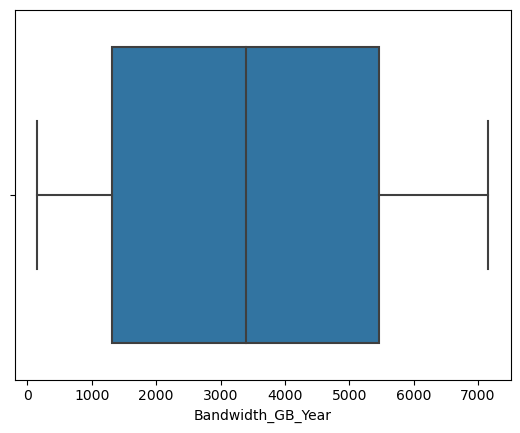

In [34]:
#Create Boxplot for 'Bandwidth_GB_Year'.
sns.boxplot(x='Bandwidth_GB_Year', data=df_cln)

<Axes: xlabel='Income'>

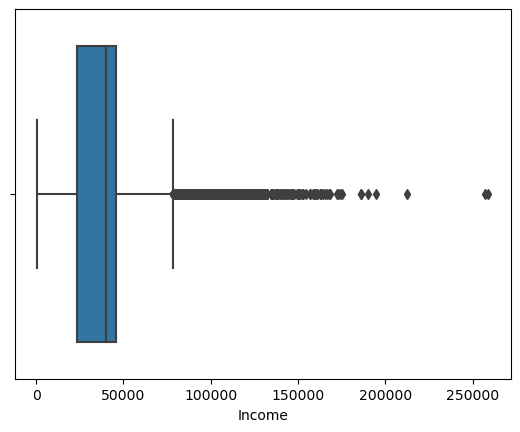

In [35]:
#Create Boxplot for 'Income'.
sns.boxplot(x='Income', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='InternetService'>

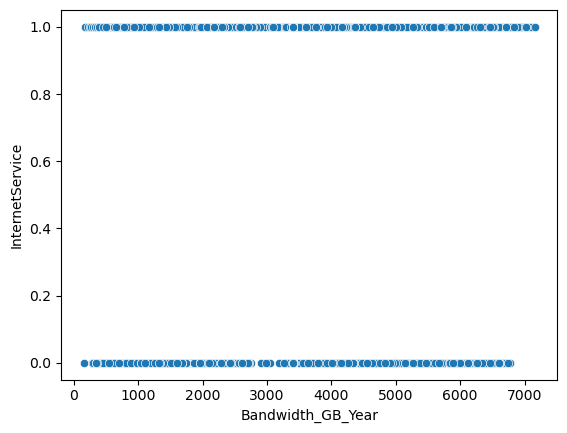

In [36]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='InternetService', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Phone'>

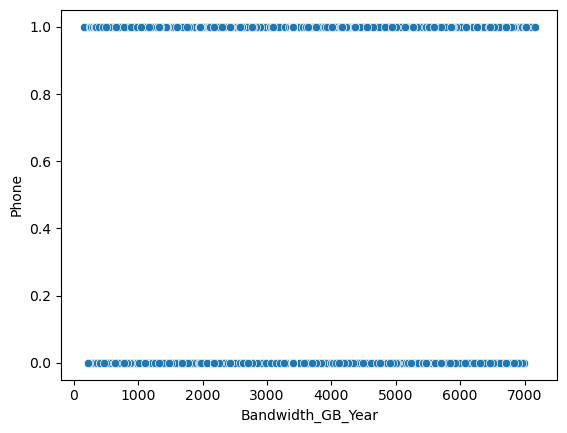

In [37]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Phone', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Multiple'>

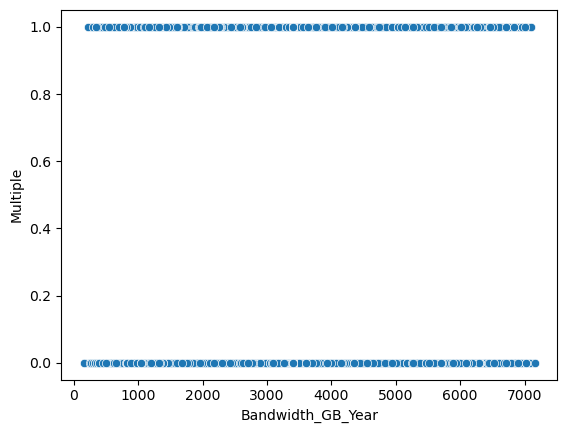

In [38]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Multiple', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='OnlineSecurity'>

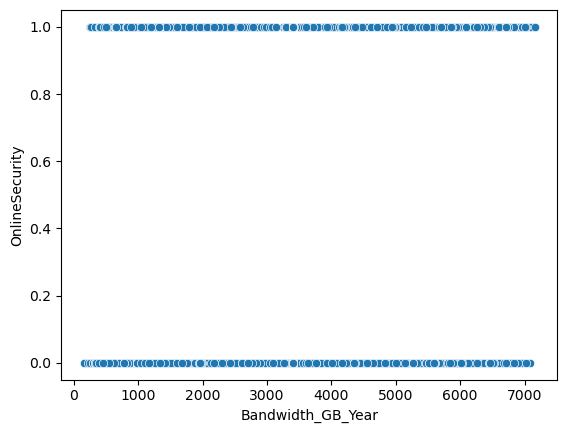

In [39]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='OnlineSecurity', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='OnlineBackup'>

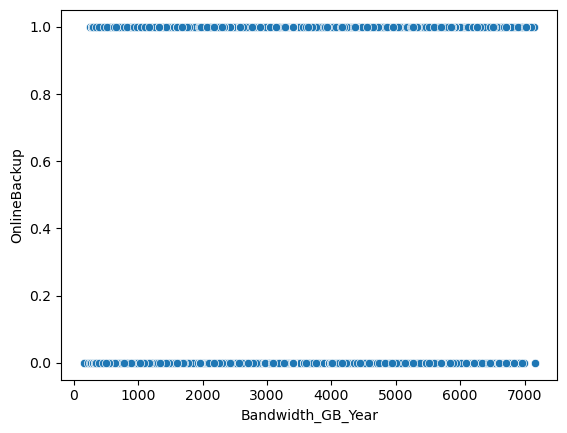

In [40]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='OnlineBackup', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='DeviceProtection'>

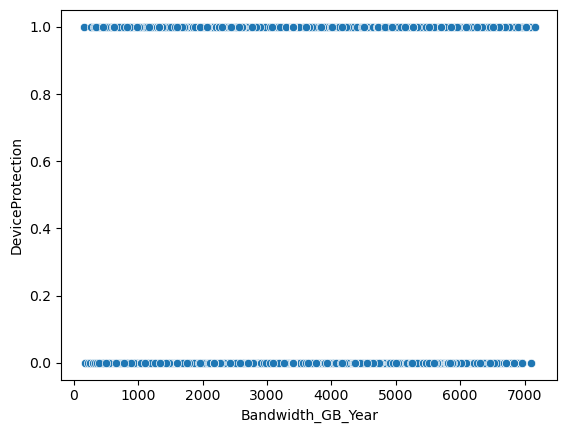

In [41]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='DeviceProtection', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='TechSupport'>

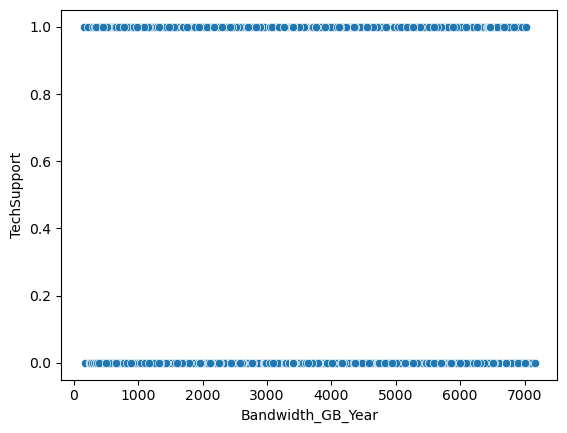

In [42]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='TechSupport', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='StreamingTV'>

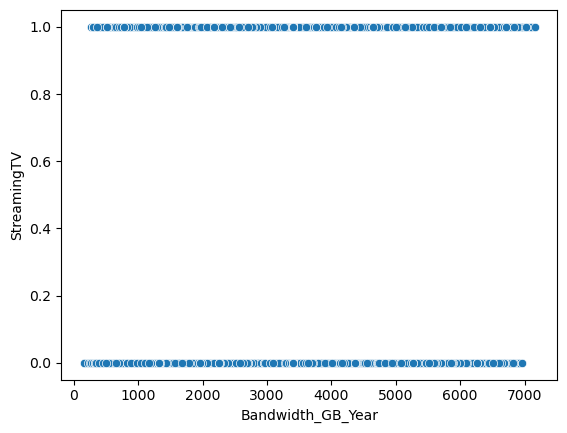

In [43]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='StreamingTV', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='StreamingMovies'>

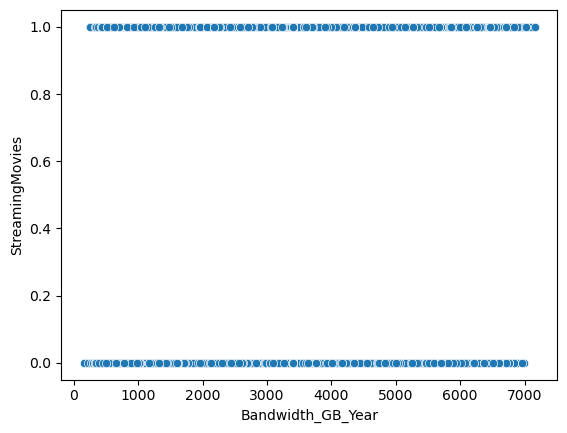

In [44]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='StreamingMovies', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Contract'>

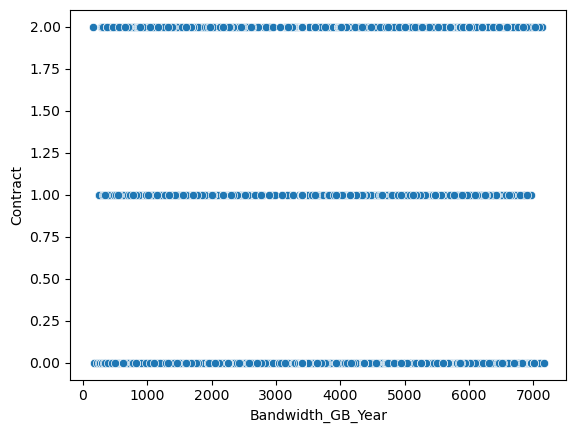

In [45]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Contract', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Area'>

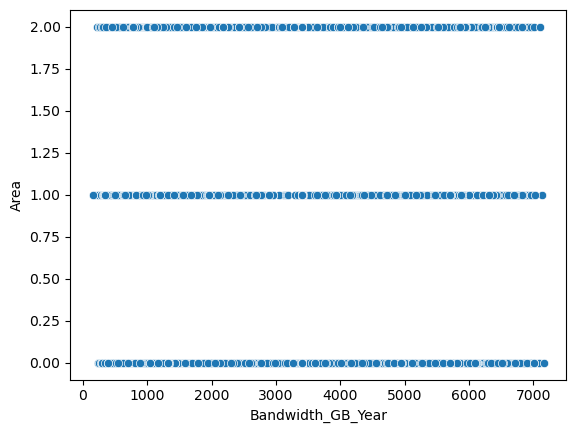

In [46]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Area', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Employment'>

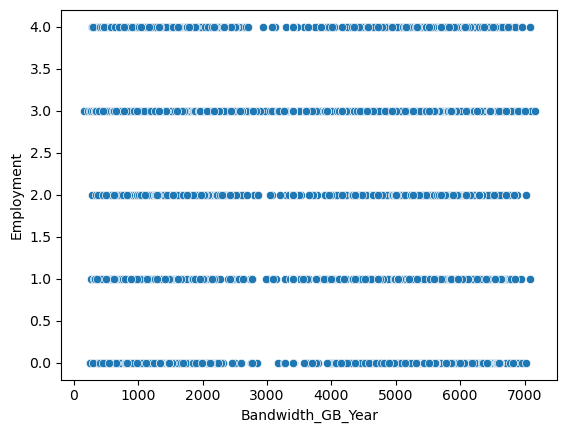

In [47]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Employment', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Income'>

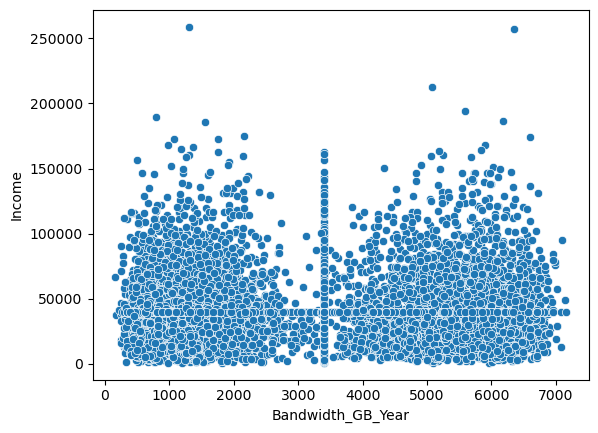

In [48]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Income', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Timely_Fixes'>

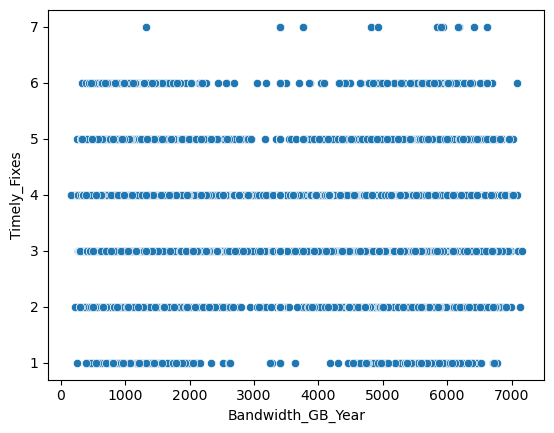

In [49]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Timely_Fixes', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Timely_Replacement'>

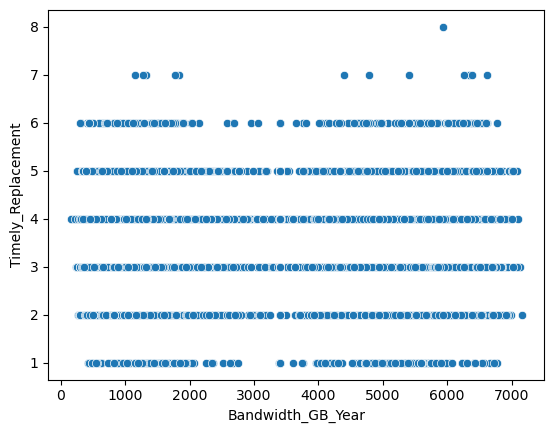

In [50]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Timely_Replacement', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Reliability'>

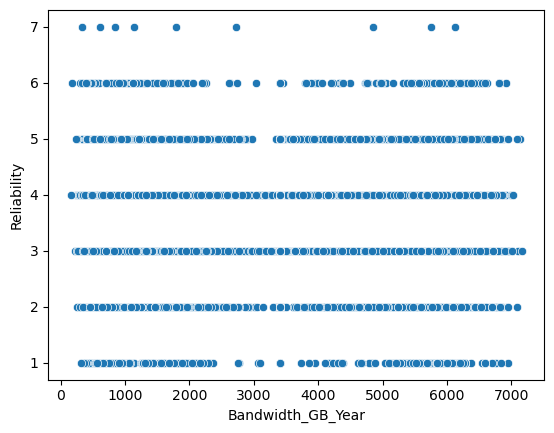

In [51]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Reliability', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Options'>

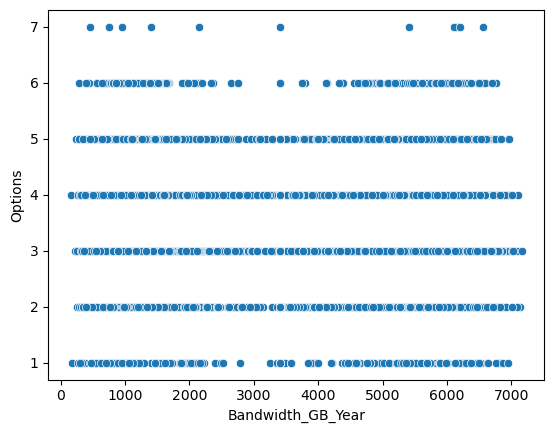

In [52]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Options', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Respectable_Response'>

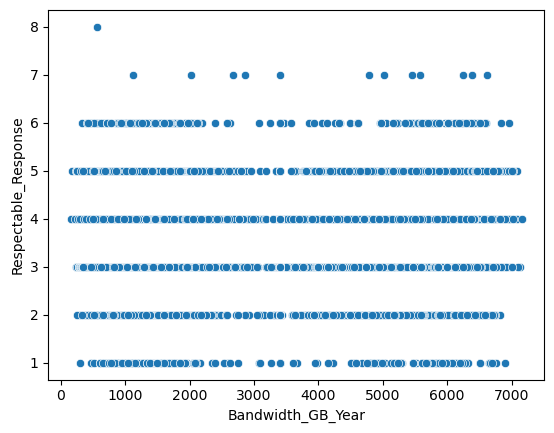

In [53]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Respectable_Response', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Courteous_Exchange'>

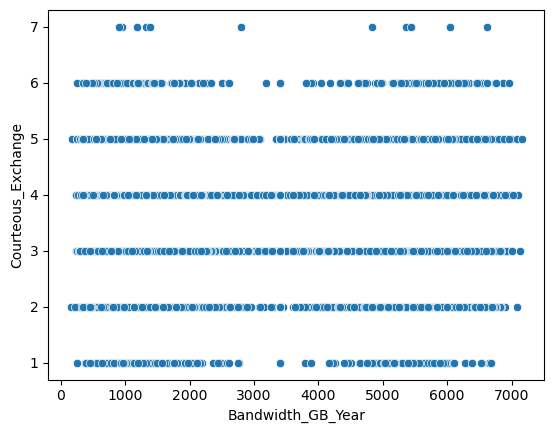

In [54]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Courteous_Exchange', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Evidence_of_active_listening'>

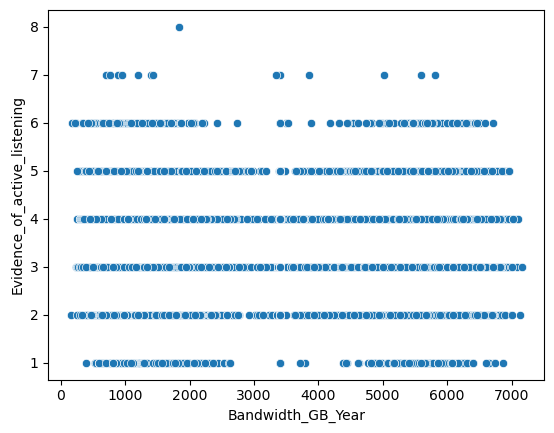

In [55]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Evidence_of_active_listening', data=df_cln)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='InternetService'>

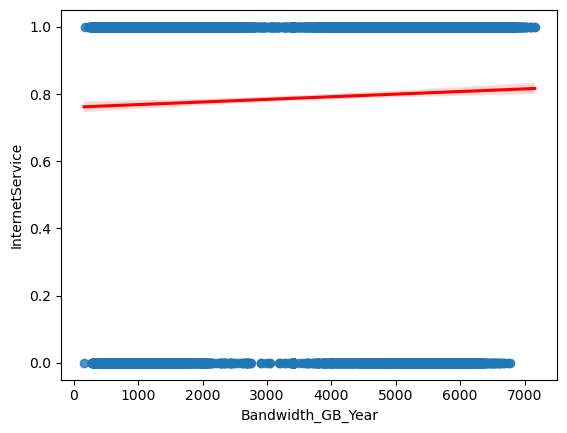

In [56]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='InternetService', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Phone'>

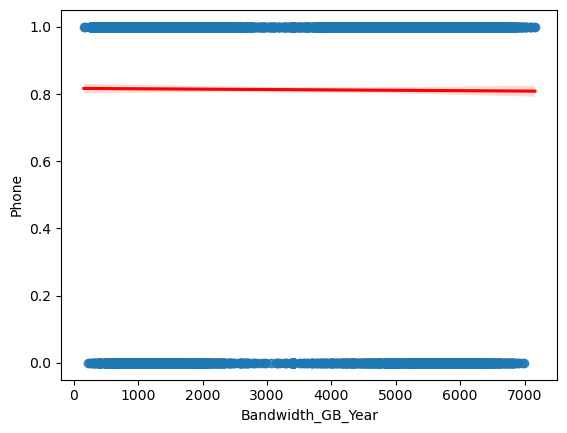

In [57]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Phone', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Multiple'>

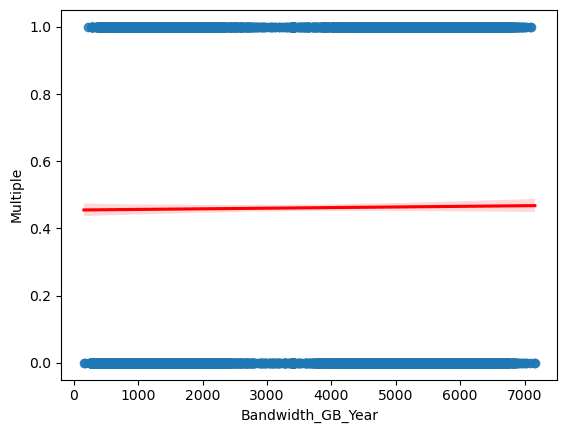

In [58]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Multiple', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='OnlineSecurity'>

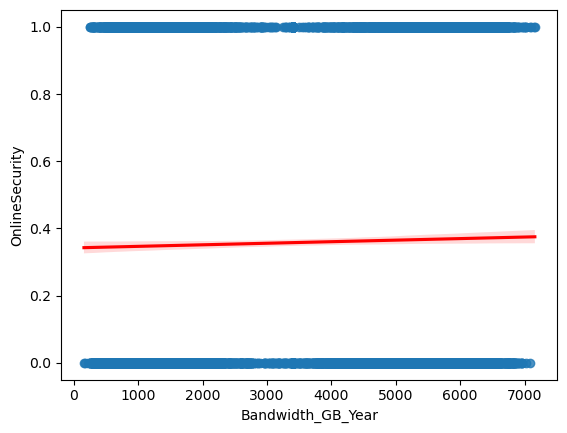

In [59]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='OnlineSecurity', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='OnlineBackup'>

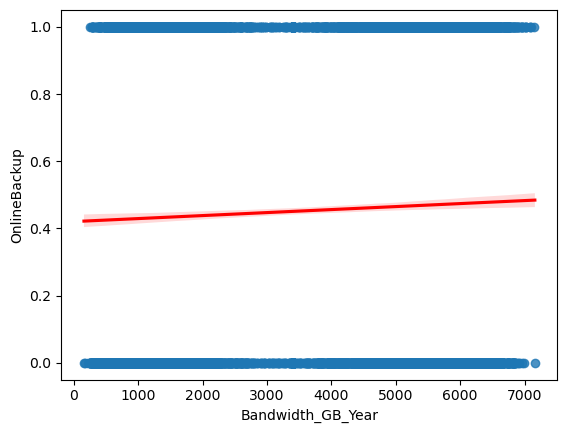

In [60]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='OnlineBackup', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='DeviceProtection'>

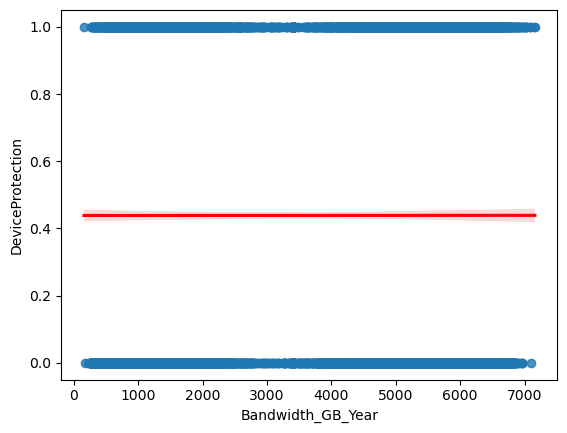

In [61]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='DeviceProtection', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='TechSupport'>

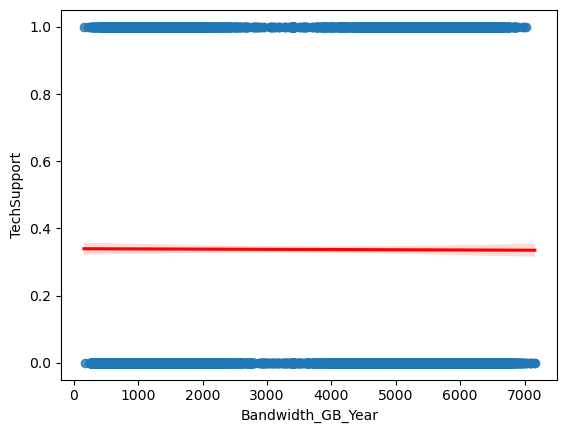

In [62]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='TechSupport', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='StreamingTV'>

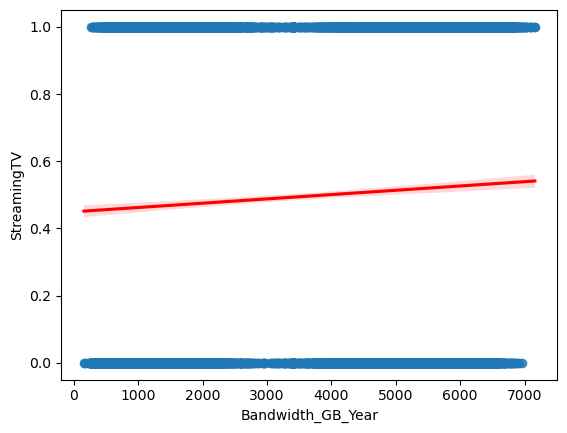

In [63]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='StreamingTV', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='StreamingMovies'>

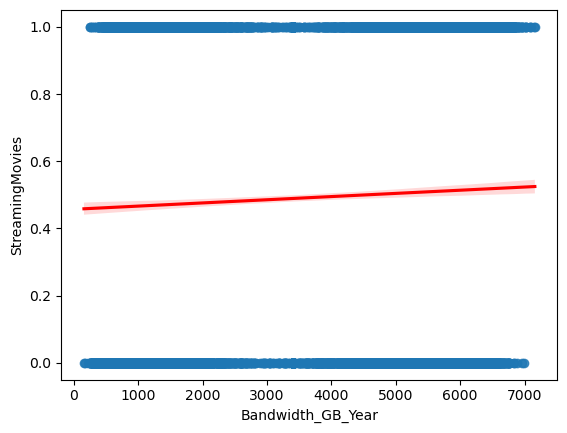

In [64]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='StreamingMovies', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Contract'>

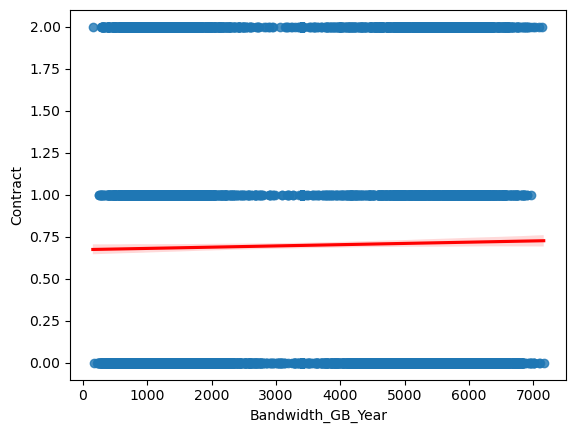

In [65]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Contract', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Area'>

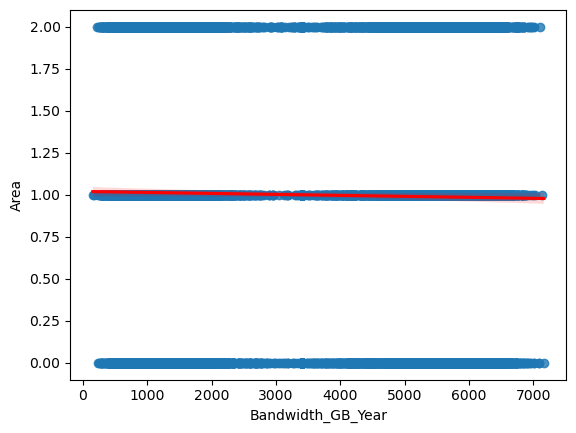

In [66]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Area', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Employment'>

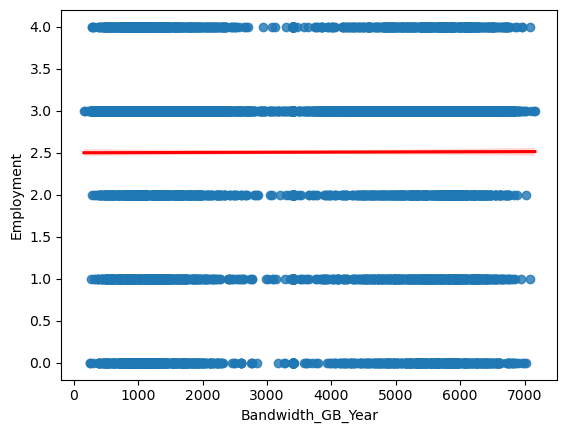

In [67]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Employment', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Income'>

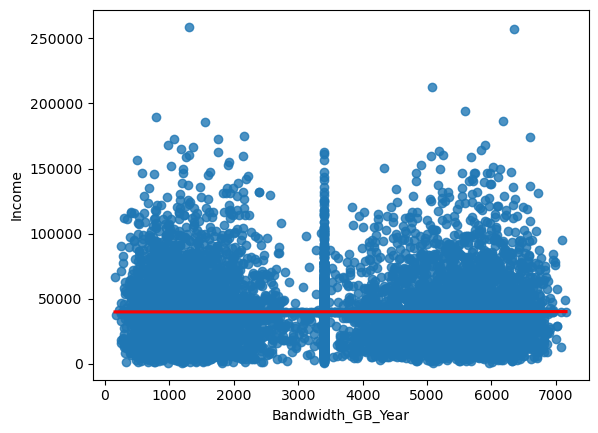

In [68]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Income', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Timely_Fixes'>

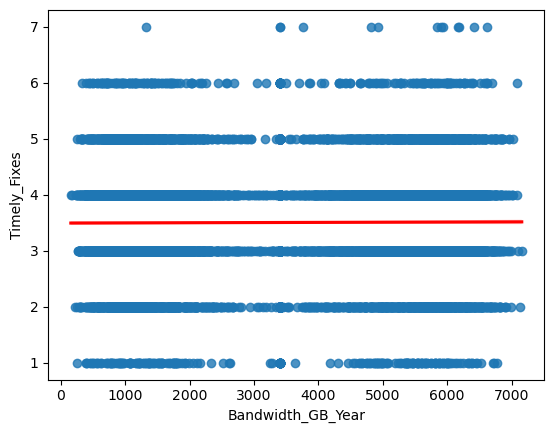

In [69]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Timely_Fixes', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Timely_Replacement'>

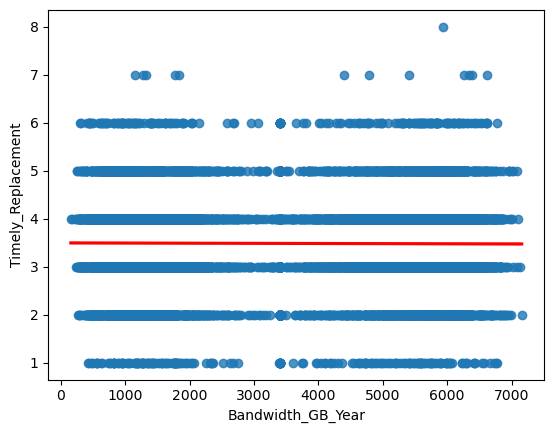

In [70]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Timely_Replacement', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Reliability'>

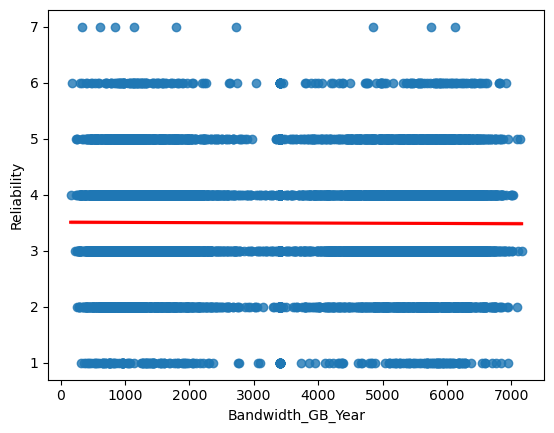

In [71]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Reliability', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Options'>

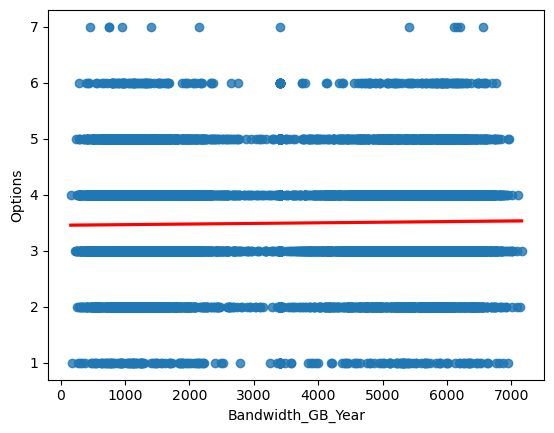

In [72]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Options', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Respectable_Response'>

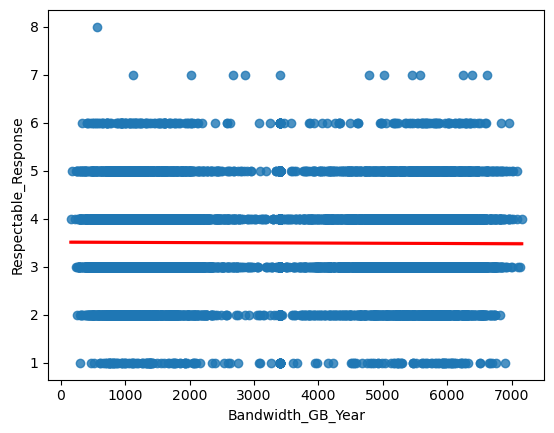

In [73]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Respectable_Response', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Courteous_Exchange'>

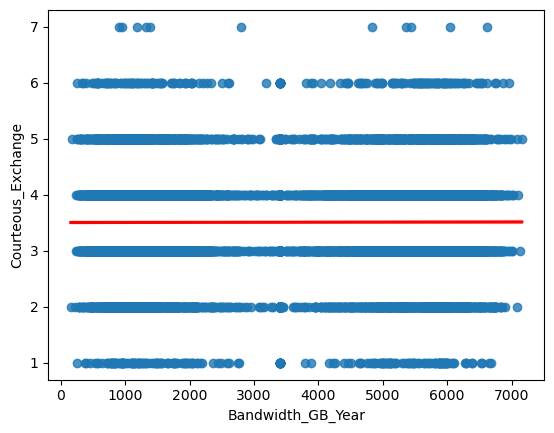

In [74]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Courteous_Exchange', data=df_cln, line_kws={"color": "red"})

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Evidence_of_active_listening'>

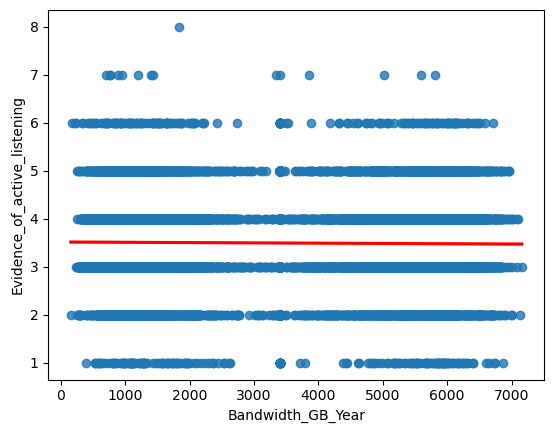

In [75]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Evidence_of_active_listening', data=df_cln, line_kws={"color": "red"})

In [76]:
#Export cleaned dataset to a new CSV file
df_cln.to_csv('D208_Cleaned_Dataset_T1.csv')

In [77]:
#Create Dummy Variables for Categorical Variables
d_var=pd.get_dummies(df[['Area','Employment','Contract']], prefix="Dummy", drop_first=True)
d_var

,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,0,0,0
2,0,1,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
9995,0,0,0,1,0,0,0,0
9996,0,0,1,0,0,0,0,1
9997,0,0,0,0,0,0,0,0
9998,0,1,0,0,0,0,0,1


In [78]:
#Add the dummy variable to a new df. Drop the rows that has null values and create copy of the data frame.
mreg_df=pd.concat([df_cln,d_var], axis=1)
mreg_df=mreg_df.dropna()
mreg_clndf=mreg_df
mreg_df=mreg_df.drop(['Area','Employment','Contract','Bandwidth_GB_Year'], axis=1)
print(mreg_clndf)

      Area  Employment        Income  Contract  InternetService  Phone  \
0      2.0         2.0  28561.990000       1.0              1.0    1.0   
1      2.0         4.0  21704.770000       0.0              1.0    1.0   
2      2.0         1.0  39936.762226       2.0              1.0    1.0   
3      1.0         4.0  18925.230000       2.0              1.0    1.0   
4      1.0         1.0  40074.190000       0.0              1.0    0.0   
...    ...         ...           ...       ...              ...    ...   
9995   0.0         4.0  55723.740000       0.0              1.0    0.0   
9996   0.0         2.0  39936.762226       2.0              1.0    0.0   
9997   0.0         3.0  39936.762226       0.0              1.0    1.0   
9998   2.0         3.0  16667.580000       2.0              1.0    0.0   
9999   2.0         3.0  39936.762226       0.0              1.0    1.0   

      Multiple  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0          0.0             1.0          

In [79]:
#Look at the new df
mreg_df.shape

(10000, 26)

In [80]:
#Summary statistic of final df
mreg_df.describe()

,Income,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Courteous_Exchange,Evidence_of_active_listening,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39936.762226,0.787100,0.812800,0.460800,0.357600,0.450600,0.438600,0.337400,0.492900,0.489000,...,3.509500,3.495600,0.334600,0.332700,0.104200,0.101100,0.096400,0.099100,0.210200,0.244200
std,24575.114845,0.409378,0.390091,0.498486,0.479317,0.497579,0.496241,0.472846,0.499975,0.499904,...,1.028502,1.028633,0.471874,0.471204,0.305535,0.301476,0.295154,0.298811,0.407471,0.429633
min,740.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23660.790000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39936.762226,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45504.192500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,258900.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
#Create new dataframe of Predictor and Target Variable for Multiple Regression Modeling
X=mreg_df
y=df_cln[['Bandwidth_GB_Year']]
y

,Bandwidth_GB_Year
0,904.536110
1,800.982766
2,2054.706961
3,2164.579412
4,271.493436
...,...
9995,6511.253000
9996,5695.952000
9997,4159.306000
9998,6468.457000


In [82]:
#Determine the correlation between the variable for variable selection.
pearson_correlation=mreg_df.corr(method='pearson')

corr=mreg_clndf.corr()
print(pearson_correlation)

                                Income  InternetService     Phone  Multiple  \
Income                        1.000000         0.003588 -0.008929 -0.000589   
InternetService               0.003588         1.000000 -0.005354  0.023055   
Phone                        -0.008929        -0.005354  1.000000  0.009061   
Multiple                     -0.000589         0.023055  0.009061  1.000000   
OnlineSecurity               -0.005745         0.018517 -0.011004 -0.002436   
OnlineBackup                 -0.008040         0.002125 -0.007459 -0.002566   
DeviceProtection              0.005266        -0.003062 -0.019602  0.003207   
TechSupport                   0.005502        -0.005515 -0.000210 -0.008375   
StreamingTV                  -0.000690        -0.002744 -0.014507  0.003097   
StreamingMovies              -0.007436         0.002972 -0.000304  0.004691   
Timely_Response               0.000833         0.015045  0.006862  0.009742   
Timely_Fixes                  0.006756         0.015

<Axes: >

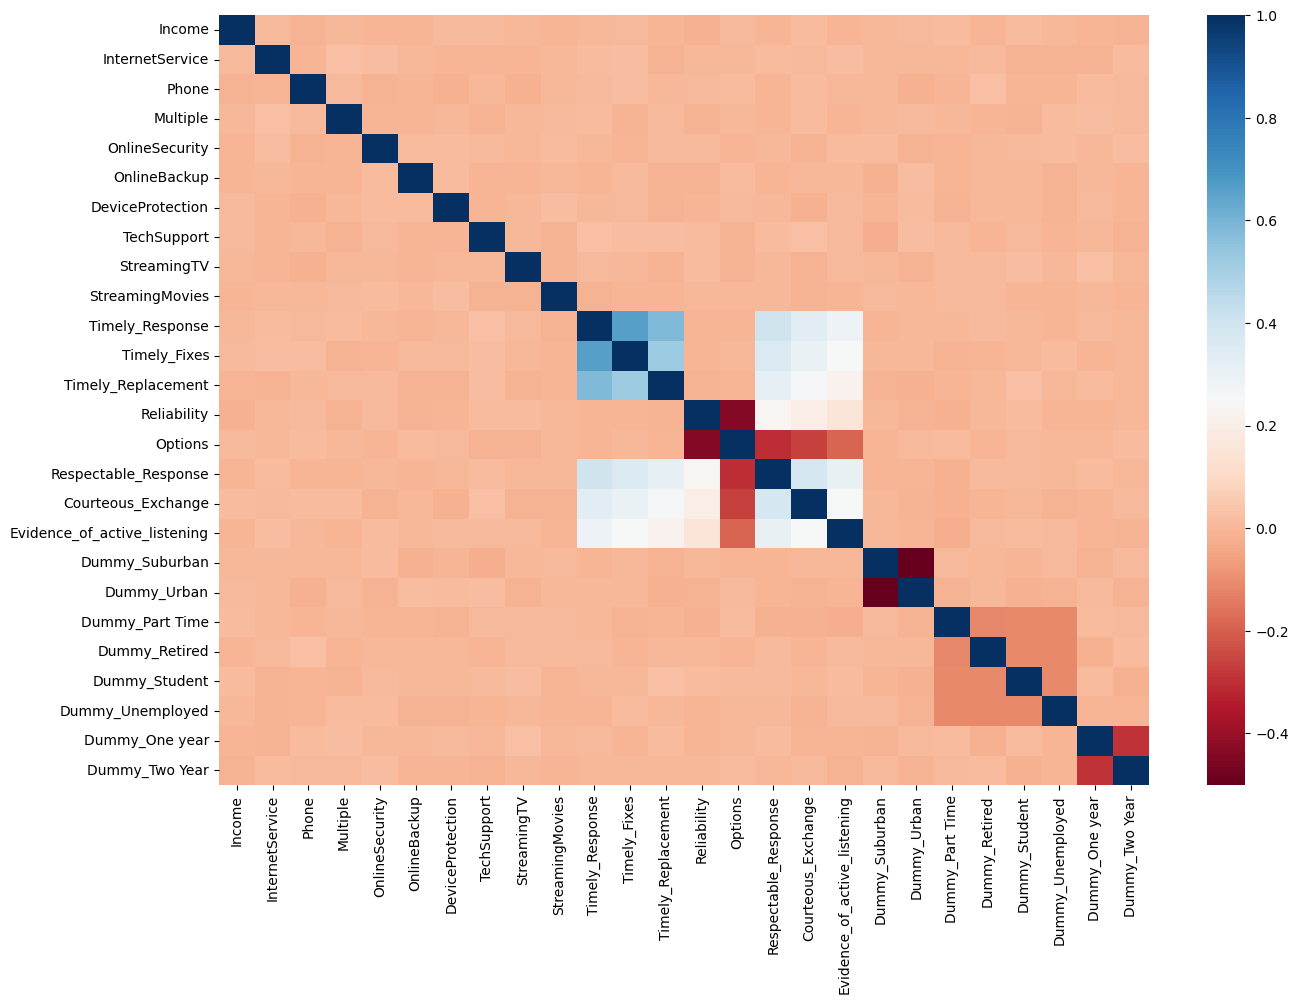

In [83]:
#Plot multicolinearity Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(pearson_correlation, xticklabels = pearson_correlation.columns, yticklabels=pearson_correlation.columns, cmap='RdBu')


In [84]:
#Use VIF to determine if value is above threshold of 5
X_int=sm.tools.add_constant(X)
series_X=pd.Series([variance_inflation_factor(X_int.values, i) for i in range(X_int.shape[1])],index=X_int.columns)
print (series_X)

const                           94.063791
Income                           1.001720
InternetService                  1.002692
Phone                            1.003073
Multiple                         1.002863
OnlineSecurity                   1.002286
OnlineBackup                     1.001681
DeviceProtection                 1.002329
TechSupport                      1.002045
StreamingTV                      1.002541
StreamingMovies                  1.001220
Timely_Response                  2.210489
Timely_Fixes                     1.931225
Timely_Replacement               1.606692
Reliability                      1.276523
Options                          1.373452
Respectable_Response             1.481622
Courteous_Exchange               1.314169
Evidence_of_active_listening     1.188885
Dummy_Suburban                   1.336458
Dummy_Urban                      1.338136
Dummy_Part Time                  1.053476
Dummy_Retired                    1.051960
Dummy_Student                    1

In [85]:
#Initial Multiple Regression Model
init_model=sm.OLS(y, X_int).fit()
print (init_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.897
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           9.01e-11
Time:                        02:03:51   Log-Likelihood:                -90504.
No. Observations:               10000   AIC:                         1.811e+05
Df Residuals:                    9973   BIC:                         1.813e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [86]:
#Partition the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size = 0.3, random_state=1)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
print (round(sum(train['Bandwidth_GB_Year'])/len(train)), 2)
print (round(sum(test['Bandwidth_GB_Year'])/len(test), 2))

3394 2
3410.95


In [87]:
#Fit the Regression Model
mreg = LinearRegression().fit(X_train, np.ravel(y_train))


In [88]:
# Make a prediction for each observation in new_data and assign it to predictions
y_predict = mreg.predict(X_test)
print(y_predict)

[3582.50689148 3396.67023601 3601.66941667 ... 3484.74343191 3038.48124694
 3623.93617431]


In [89]:
#Multiple Regression on Train Model
init_train=sm.OLS(y_train, X_train).fit()
print (init_train.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.646
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           1.07e-05
Time:                        02:03:51   Log-Likelihood:                -63356.
No. Observations:                7000   AIC:                         1.268e+05
Df Residuals:                    6973   BIC:                         1.270e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [90]:
#Find Rsquare
r_sqr=r2_score(y_test,y_predict)
r_sqr

0.008070636567475975

In [91]:
init_train.resid.shape

(7000,)

In [92]:
init_train.model.exog.shape

(7000, 27)

In [93]:
X_int

,const,Income,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Courteous_Exchange,Evidence_of_active_listening,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
0,1.0,28561.990000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,4,0,1,1,0,0,0,1,0
1,1.0,21704.770000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,4,4,0,1,0,1,0,0,0,0
2,1.0,39936.762226,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,3,0,1,0,0,1,0,0,1
3,1.0,18925.230000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,3,1,0,0,1,0,0,0,1
4,1.0,40074.190000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,55723.740000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2,3,0,0,0,1,0,0,0,0
9996,1.0,39936.762226,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,2,5,0,0,1,0,0,0,0,1
9997,1.0,39936.762226,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,4,5,0,0,0,0,0,0,0,0
9998,1.0,16667.580000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,5,4,0,1,0,0,0,0,0,1


In [96]:
X_train.shape

(7000, 27)

In [94]:
#Detect Heteroscedasticity using White's Test
_, pval, _, f_pval=diag.het_white(init_train.resid, init_train.model.exog)
print(pval,f_pval)

if pval>0.05:
    print("For the White's Test")
    print('Pvalue was {:.4f}'.format(pval))
    print('We fail to reject the null hypthoesis, so there is no heteroscedasticity')
else:
    print("For the White's Test")
    print('Pvalue was {:.4f}'.format(pval))
    print('We reject the null hypthoesis, so there is heteroscedasticity')
          


0.395702138329136 0.3947667165358973
For the White's Test
Pvalue was 0.3957
We fail to reject the null hypthoesis, so there is no heteroscedasticity


In [93]:
#Detect Heteroscedasticity using Bruesch-Pagan Test
_, pval1, _, f_pval1=diag.het_breuschpagan(init_train.resid, init_train.model.exog)
print(pval1,f_pval1)
if pval1>0.05:
    print("For the Bruesch-Pagan Test")
    print('Pvalue was {:.4f}'.format(pval1))
    print('We fail to reject the null hypthoesis, so there is no heteroscedasticity')
else:
    print("For the Bruesch-Pagan Test")
    print('Pvalue was {:.4f}'.format(pval1))
    print('We reject the null hypthoesis, so there is heteroscedasticity')

0.40273208026932406 0.40302241773100583
For the Bruesch-Pagan Test
Pvalue was 0.4027
We fail to reject the null hypthoesis, so there is no heteroscedasticity


In [94]:
#Check the pvalues
init_train.pvalues

const                           9.665172e-35
Income                          4.869277e-01
InternetService                 2.459760e-03
Phone                           9.673785e-01
Multiple                        9.176172e-01
OnlineSecurity                  3.216673e-01
OnlineBackup                    4.295495e-04
DeviceProtection                9.638742e-01
TechSupport                     5.876004e-01
StreamingTV                     1.029737e-05
StreamingMovies                 2.081931e-04
Timely_Response                 4.987104e-01
Timely_Fixes                    7.113013e-01
Timely_Replacement              7.183575e-01
Reliability                     6.101586e-01
Options                         1.396229e-01
Respectable_Response            5.844606e-01
Courteous_Exchange              8.285456e-01
Evidence_of_active_listening    6.603455e-01
Dummy_Suburban                  1.368499e-01
Dummy_Urban                     1.866344e-01
Dummy_Part Time                 6.181159e-01
Dummy_Reti

In [95]:
#Check the Mean Residuals for normal distributed residuals. Closer to zero is good.
mean_residuals =sum(init_train.resid)/len(init_train.resid)
print('{:.15f}'.format(mean_residuals))

-0.000000000000614


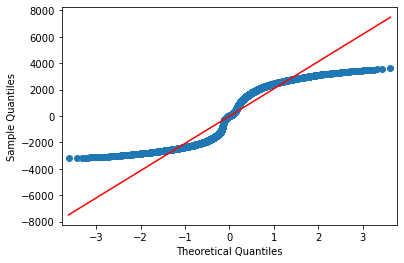

In [96]:
#Plot mean of residual
sm.qqplot(init_train.resid, line='s')
plt.show()

In [97]:
#Measure of Error
model_mse=mean_squared_error(y_test,y_predict)
model_mae=mean_absolute_error(y_test, y_predict)
model_rmse=math.sqrt(model_mse)

print('MSE {:.3f})'.format(model_mse))
print('MAE {:.3f})'.format(model_mae))
print('RMSE {:.3f})'.format(model_rmse))

MSE 4254765.030)
MAE 1871.674)
RMSE 2062.708)


<AxesSubplot:xlabel='Bandwidth_GB_Year'>

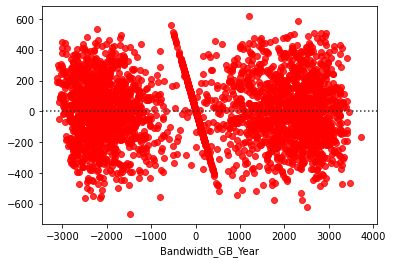

In [98]:
#Plot residual
residual=y_test['Bandwidth_GB_Year'] - y_predict
sns.residplot(x = residual, y = y_predict, color = 'red')

In [99]:
#Reduce data based on P-value <0.05
red_data=X[['InternetService','OnlineBackup','StreamingTV','StreamingMovies']]
red_df=sm.tools.add_constant(red_data)

<AxesSubplot:>

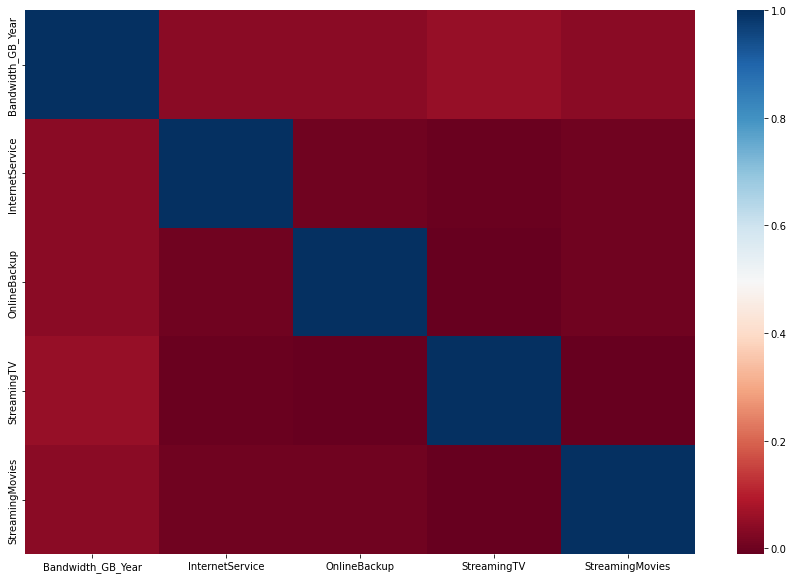

In [100]:
#Plot multicolinearity Heatmap for reduce variables
red_corr=mreg_clndf[['Bandwidth_GB_Year','InternetService','OnlineBackup','StreamingTV','StreamingMovies']]
plt.figure(figsize=(15,10))
sns.heatmap(red_corr.corr(), xticklabels = red_corr.columns, yticklabels=red_corr.columns, cmap='RdBu')


In [101]:
#Partition the data for testing reduced model
X_train1, X_test1, y_train, y_test = train_test_split(red_df, y, test_size = 0.3, random_state=1)
train1 = pd.concat([X_train1, y_train], axis=1)
test1 = pd.concat([X_test1, y_test], axis=1)
print (round(sum(train['Bandwidth_GB_Year'])/len(train1)), 2)
print (round(sum(test['Bandwidth_GB_Year'])/len(test1), 2))

3394 2
3410.95


In [102]:
#Fit the Regression Model
mreg = LinearRegression().fit(X_train1, np.ravel(y_train))

In [103]:
# Make a prediction for each observation in new_data and assign it to predictions
y_predict1 = mreg.predict(X_test1)
print(y_predict1)

[3552.61903449 3334.96714979 3735.61057363 ... 3334.96714979 3156.90524868
 3517.95868892]


In [104]:
#Summary of reduced Multiple Regression model with Train Data
red_model=sm.OLS(y_train, X_train1).fit()
print (red_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.76
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           3.54e-11
Time:                        15:43:59   Log-Likelihood:                -63363.
No. Observations:                7000   AIC:                         1.267e+05
Df Residuals:                    6995   BIC:                         1.268e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2970.5444     67.291     

# The coefficients for all variables from the reduced model above are positive indicating that as each of those variables increases by 1, we can expect “Bandwidth_GB_Year” to increase according to their corresponding coefficient. See below.

o	As InternetService increases by 1 unit, Bandwidth_GB_Year is expected to increase by 186.36 units.
o	As OnlineBackup increases by 1 unit, Bandwidth_GB_Year is expected to increase by 178.06 units.
o	As StreamingTV increases by 1 unit, Bandwidth_GB_Year is expected to increase by 217.65 units.
o	As StreamingMovies increases by 1 unit, Bandwidth_GB_Year is expected to increase by 182.99 units.


In [105]:
#Find Rsquare
r_sqr1=r2_score(y_test,y_predict1)
r_sqr1

0.006056668544693222

In [106]:
#Detect Heteroscedasticity using White's Test
_, pval2, _, f_pval2=diag.het_white(red_model.resid, red_model.model.exog)
print(pval2,f_pval2)

if pval2>0.05:
    print("For the White's Test")
    print('Pvalue was {:.4f}'.format(pval2))
    print('We fail to reject the null hypthoesis, so there is no heteroscedasticity')
else:
    print("For the White's Test")
    print('Pvalue was {:.4f}'.format(pval2))
    print('We reject the null hypthoesis, so there is heteroscedasticity')
          


0.8328546191716018 0.8331292203930896
For the White's Test
Pvalue was 0.8329
We fail to reject the null hypthoesis, so there is no heteroscedasticity


In [107]:
#Detect Heteroscedasticity using Bruesch-Pagan Test
_, pval3, _, f_pval3=diag.het_breuschpagan(red_model.resid, red_model.model.exog)
print(pval3,f_pval3)
if pval3>0.05:
    print("For the Bruesch-Pagan Test")
    print('Pvalue was {:.4f}'.format(pval3))
    print('We fail to reject the null hypthoesis, so there is no heteroscedasticity')
else:
    print("For the Bruesch-Pagan Test")
    print('Pvalue was {:.4f}'.format(pval3))
    print('We reject the null hypthoesis, so there is heteroscedasticity')

0.9147857659969617 0.9148581580428827
For the Bruesch-Pagan Test
Pvalue was 0.9148
We fail to reject the null hypthoesis, so there is no heteroscedasticity


In [108]:
#Check the pvalues
red_model.pvalues

const              0.000000
InternetService    0.001953
OnlineBackup       0.000337
StreamingTV        0.000011
StreamingMovies    0.000214
dtype: float64

In [109]:
#Check the Mean Residuals for normal distributed residuals. Closer to zero is good.
mean_residuals1 =sum(red_model.resid)/len(red_model.resid)
print('{:.15f}'.format(mean_residuals1))

-0.000000000000430


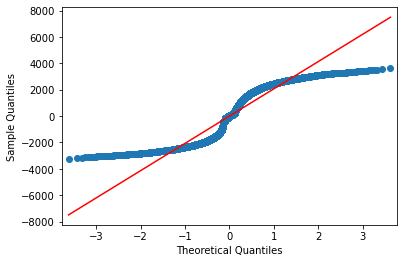

In [110]:
#Plot mean of residual
sm.qqplot(red_model.resid, line='s')
plt.show()

In [111]:
#Measure of Error
model_mse1=mean_squared_error(y_test,y_predict1)
model_mae1=mean_absolute_error(y_test, y_predict1)
model_rmse1=math.sqrt(model_mse1)

print('MSE {:.3f})'.format(model_mse1))
print('MAE {:.3f})'.format(model_mae1))
print('RMSE {:.3f})'.format(model_rmse1))

MSE 4263403.710)
MAE 1874.141)
RMSE 2064.801)


<AxesSubplot:xlabel='Bandwidth_GB_Year'>

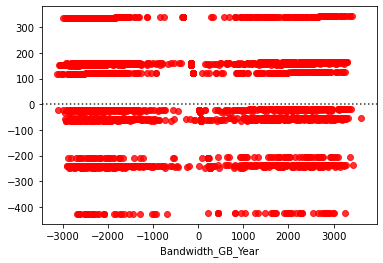

In [112]:
#Plot residual
residual1=y_test['Bandwidth_GB_Year'] - y_predict1
sns.residplot(x = residual1, y = y_predict1, color = 'red')